In [27]:
import pandas as pd
import pathlib
import numpy as np
FILE_DIR = pathlib.Path('/Users/ashhadulislam/projects/general_data/CMI/ Detect Behavior with Sensor Data/cmi-detect-behavior-with-sensor-data/')  
SEED = 42


In [2]:

train_df=pd.read_csv(FILE_DIR/'train.csv')
train_demographics_df = pd.read_csv(FILE_DIR / 'train_demographics.csv')


In [3]:
train_df.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
train_df.shape

(574945, 341)

In [5]:
train_df = pd.merge(train_df, train_demographics_df, how="left", on="subject")


In [6]:
with pd.option_context('display.max_rows', None):
    display(train_df.isna().sum().sort_values(ascending=False))#

thm_5                   33286
tof_5_v57               30142
tof_5_v22               30142
tof_5_v17               30142
tof_5_v18               30142
tof_5_v19               30142
tof_5_v20               30142
tof_5_v21               30142
tof_5_v23               30142
tof_5_v15               30142
tof_5_v24               30142
tof_5_v25               30142
tof_5_v26               30142
tof_5_v27               30142
tof_5_v28               30142
tof_5_v29               30142
tof_5_v16               30142
tof_5_v14               30142
tof_5_v31               30142
tof_5_v4                30142
tof_5_v58               30142
tof_5_v59               30142
tof_5_v0                30142
tof_5_v1                30142
tof_5_v2                30142
tof_5_v3                30142
tof_5_v5                30142
tof_5_v13               30142
tof_5_v6                30142
tof_5_v8                30142
tof_5_v9                30142
tof_5_v10               30142
tof_5_v11               30142
tof_5_v12 

In [7]:
train_df.phase.unique()


array(['Transition', 'Gesture'], dtype=object)

In [8]:
train_df.behavior.unique()

array(['Relaxes and moves hand to target location',
       'Hand at target location', 'Performs gesture',
       'Moves hand to target location'], dtype=object)

In [9]:
train_df.gesture.unique()

array(['Cheek - pinch skin', 'Forehead - pull hairline',
       'Write name on leg', 'Feel around in tray and pull out an object',
       'Neck - scratch', 'Neck - pinch skin', 'Eyelash - pull hair',
       'Eyebrow - pull hair', 'Forehead - scratch',
       'Above ear - pull hair', 'Wave hello', 'Write name in air',
       'Text on phone', 'Pull air toward your face',
       'Pinch knee/leg skin', 'Scratch knee/leg skin',
       'Drink from bottle/cup', 'Glasses on/off'], dtype=object)

In [10]:
imu_cols = [col for col in train_df.columns if col.startswith("tof") or col.startswith("acc") or col.startswith("rot") or col.startswith("thm")]
print(imu_cols)

['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', 'tof_1_v60', 'tof_1_v61', 'tof_1_v62', 'tof_1_v63', 'tof_2_v0', 'tof_2_v1', 'tof_2_v2', 'tof_2_v3', 'tof_2_v4', 'tof_2_v5

In [11]:
BFRB_gestures = ["Above ear - pull hair", "Forehead - pull hairline", "Forehead - scratch", "Eyebrow - pull hair", 
                 "Eyelash - pull hair", "Neck - pinch skin", "Neck - scratch", "Cheek - pinch skin"]

train_df["BFRB"] = train_df.gesture.isin(BFRB_gestures)

In [12]:
train_df.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm,BFRB
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,0,12,1,1,163.0,52,24.0,True
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,0,12,1,1,163.0,52,24.0,True
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,0,12,1,1,163.0,52,24.0,True
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,0,12,1,1,163.0,52,24.0,True
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,0,12,1,1,163.0,52,24.0,True


In [13]:
sensor_df = train_df.set_index("row_id")[imu_cols]
non_sensor_df = train_df.drop(columns=imu_cols)

In [14]:
non_sensor_df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm,BFRB
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0,12,1,1,163.0,52,24.0,True
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0,12,1,1,163.0,52,24.0,True
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0,12,1,1,163.0,52,24.0,True
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0,12,1,1,163.0,52,24.0,True
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0,12,1,1,163.0,52,24.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,1,30,0,1,186.0,55,30.0,False
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,1,30,0,1,186.0,55,30.0,False
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,1,30,0,1,186.0,55,30.0,False
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,1,30,0,1,186.0,55,30.0,False


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style="whitegrid")
sns.set_style("darkgrid")
sns.set_palette("dark")

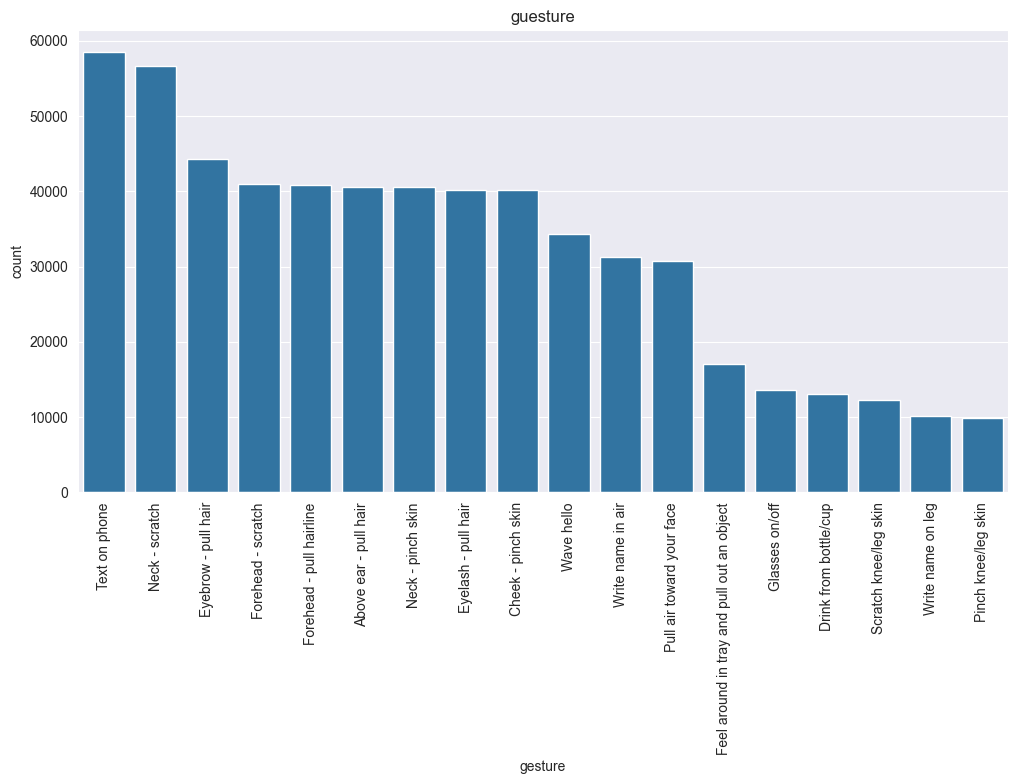

In [16]:
plt.figure(figsize=(12, 6))

gesture_order = non_sensor_df['gesture'].value_counts().index
sns.countplot(data=non_sensor_df, x="gesture", color='#1f77b4', order=gesture_order)

plt.xticks(rotation=90)
plt.title("guesture")

plt.show()

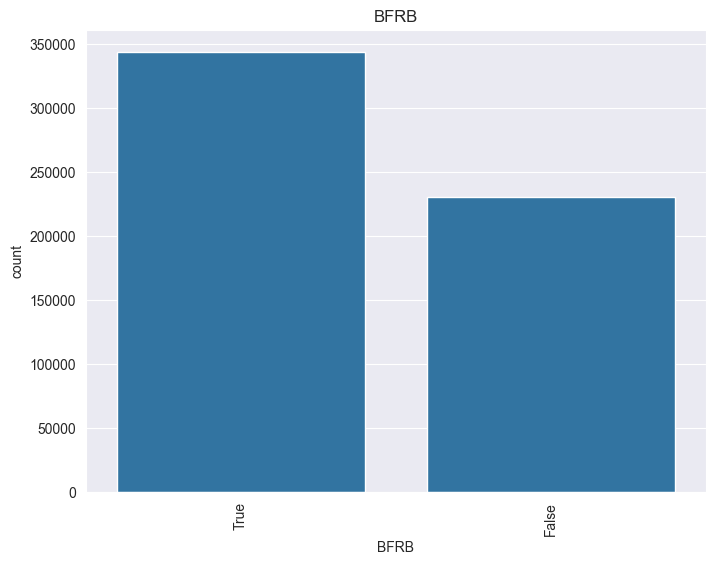

In [17]:
plt.figure(figsize=(8, 6))

gesture_order = non_sensor_df['BFRB'].value_counts().index
sns.countplot(data=non_sensor_df, x="BFRB", color='#1f77b4', order=gesture_order)

plt.xticks(rotation=90)
plt.title("BFRB")

plt.show()

In [18]:
num_cols = ['age', 'height_cm', 'shoulder_to_wrist_cm', 'elbow_to_wrist_cm']
cat_cols = list(set(non_sensor_df.columns) - set(num_cols) - set(['gesture', 'subject', 'sequence_counter', 'sequence_id', 'row_id', 'BFRB']))
print(cat_cols)

['orientation', 'behavior', 'phase', 'adult_child', 'sex', 'sequence_type', 'handedness']


  0%|          | 0/7 [00:00<?, ?it/s]

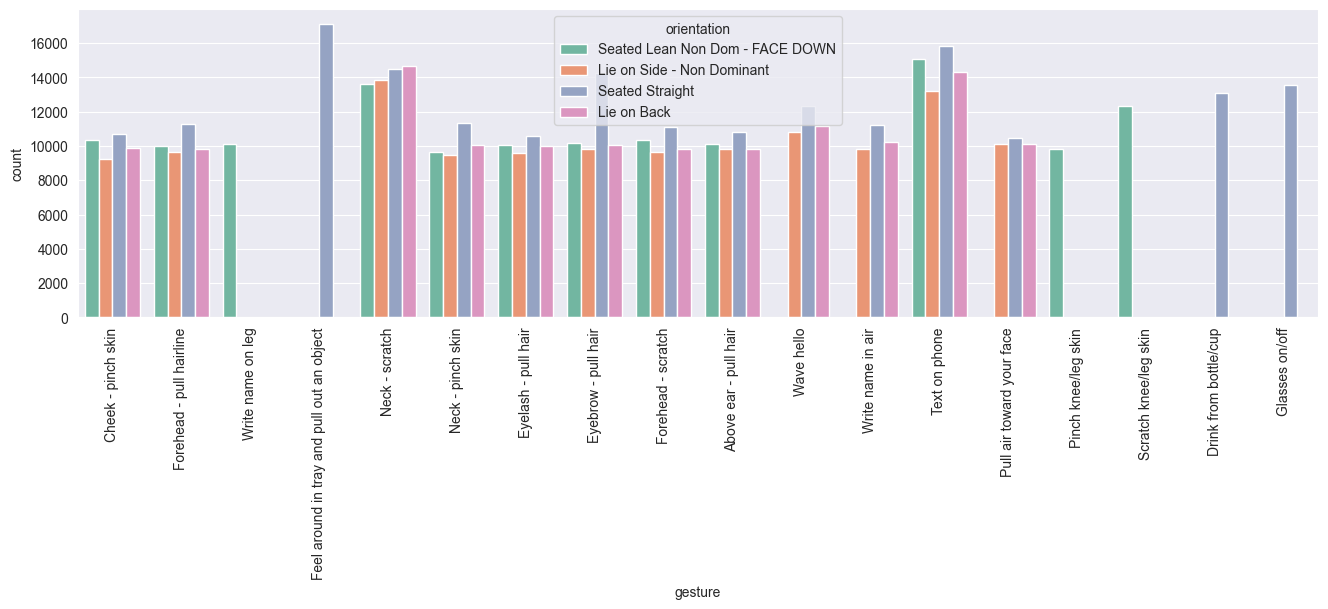

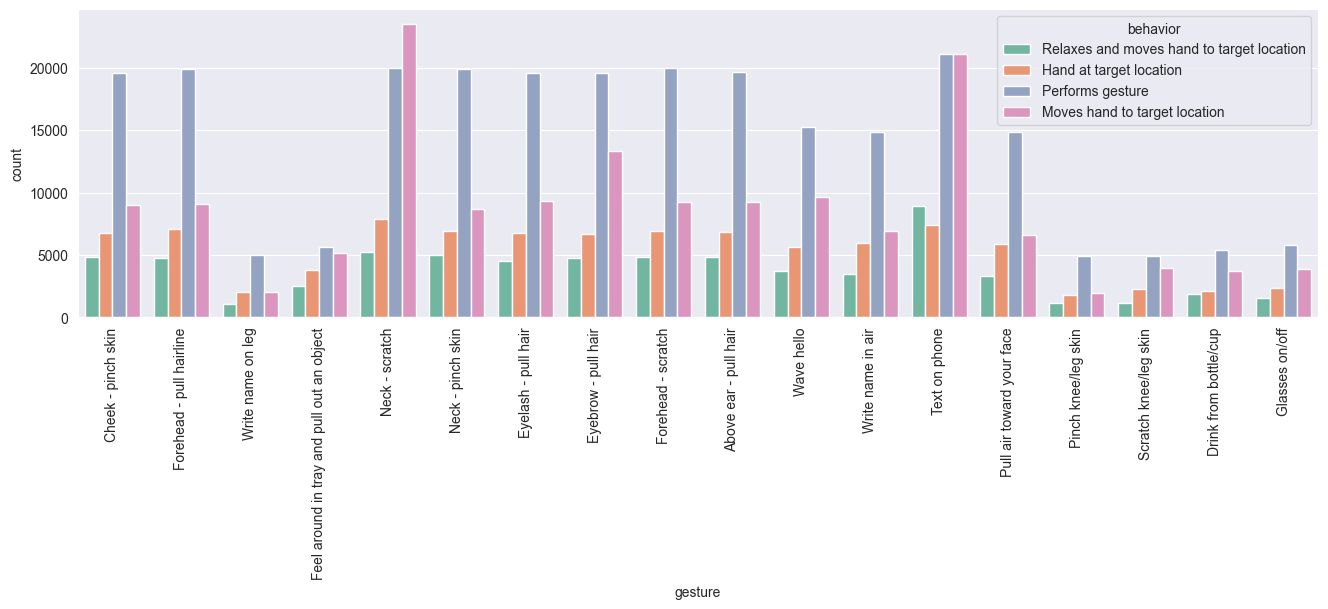

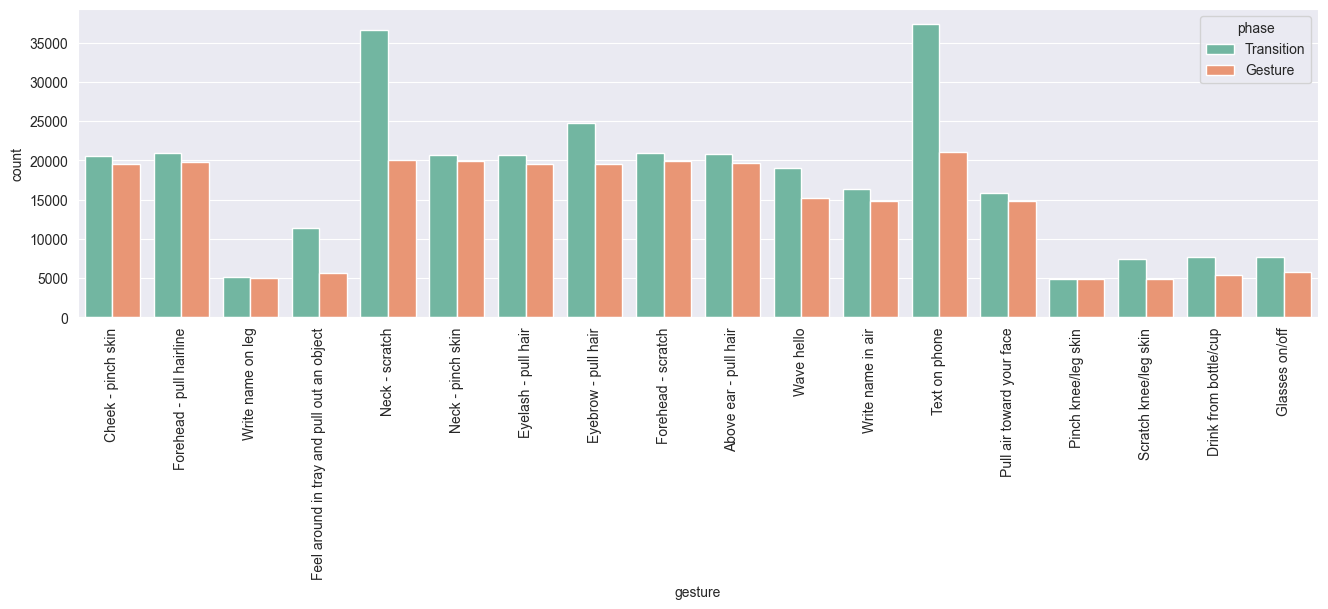

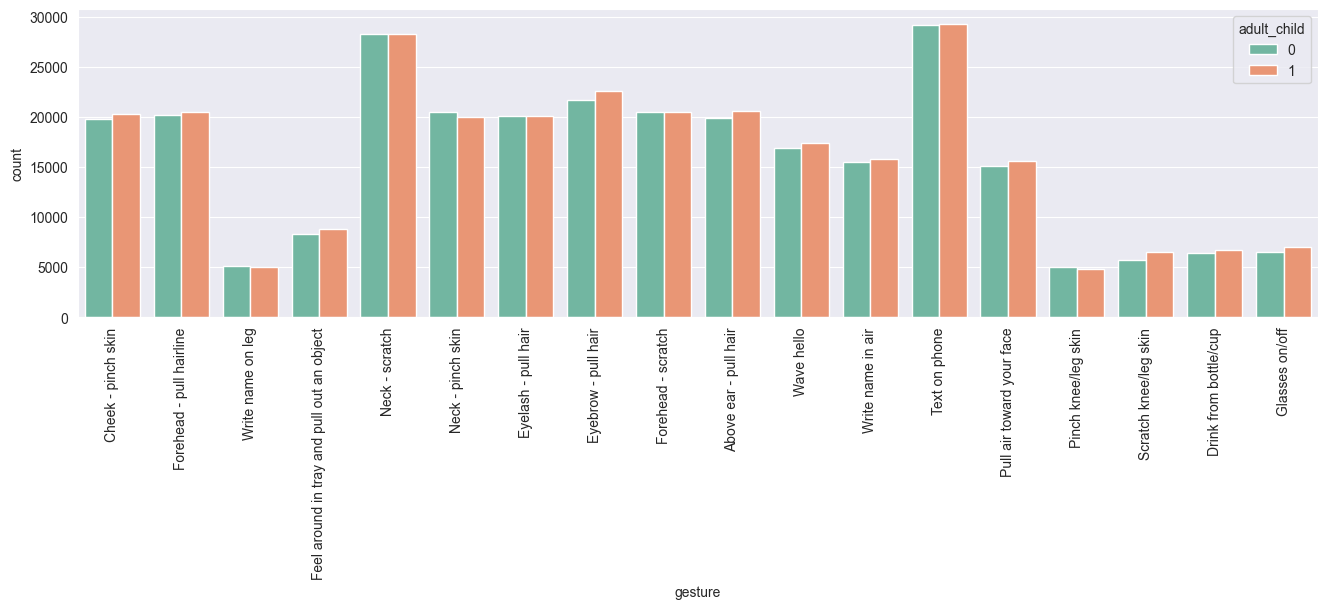

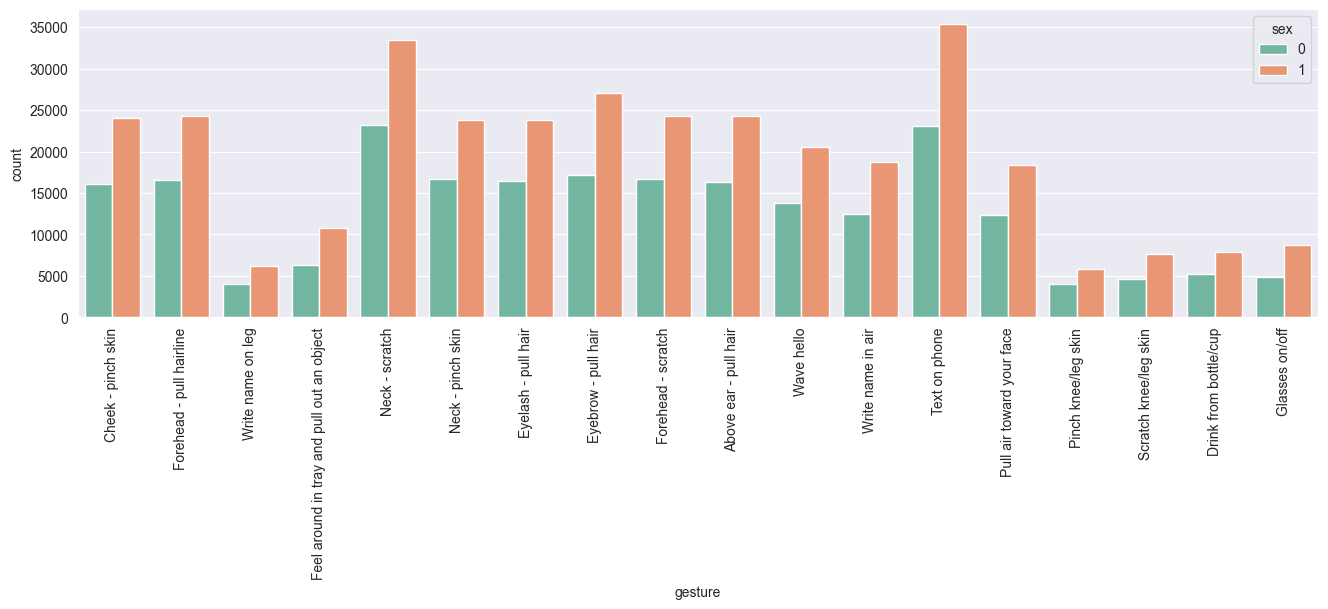

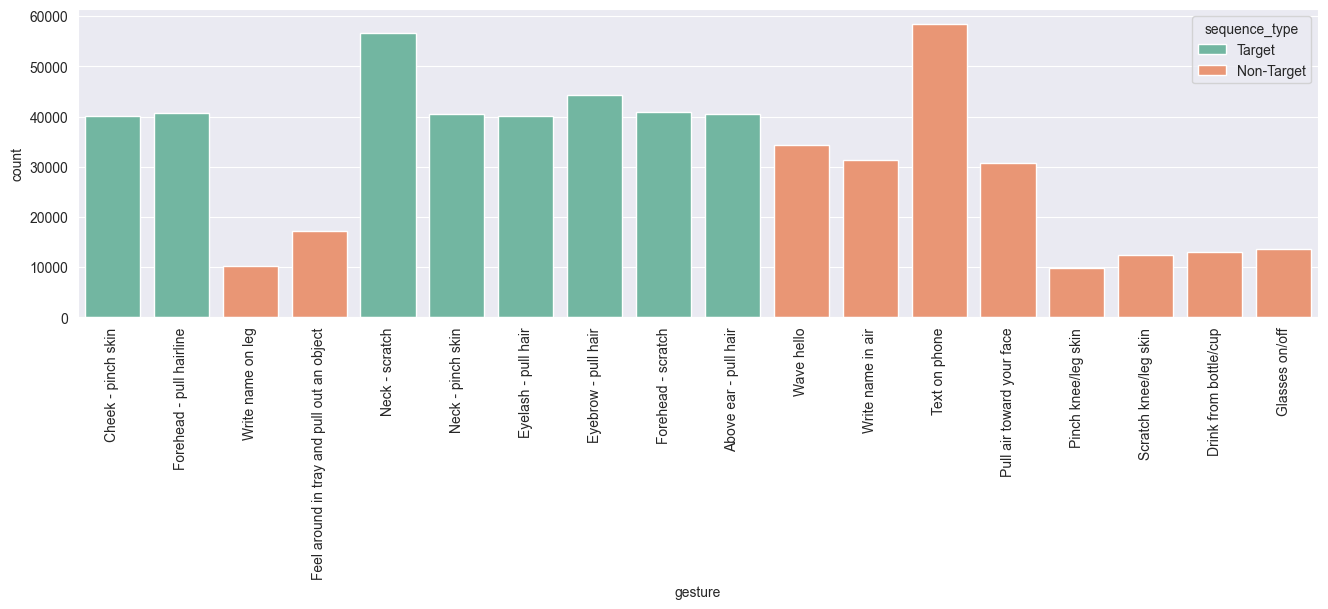

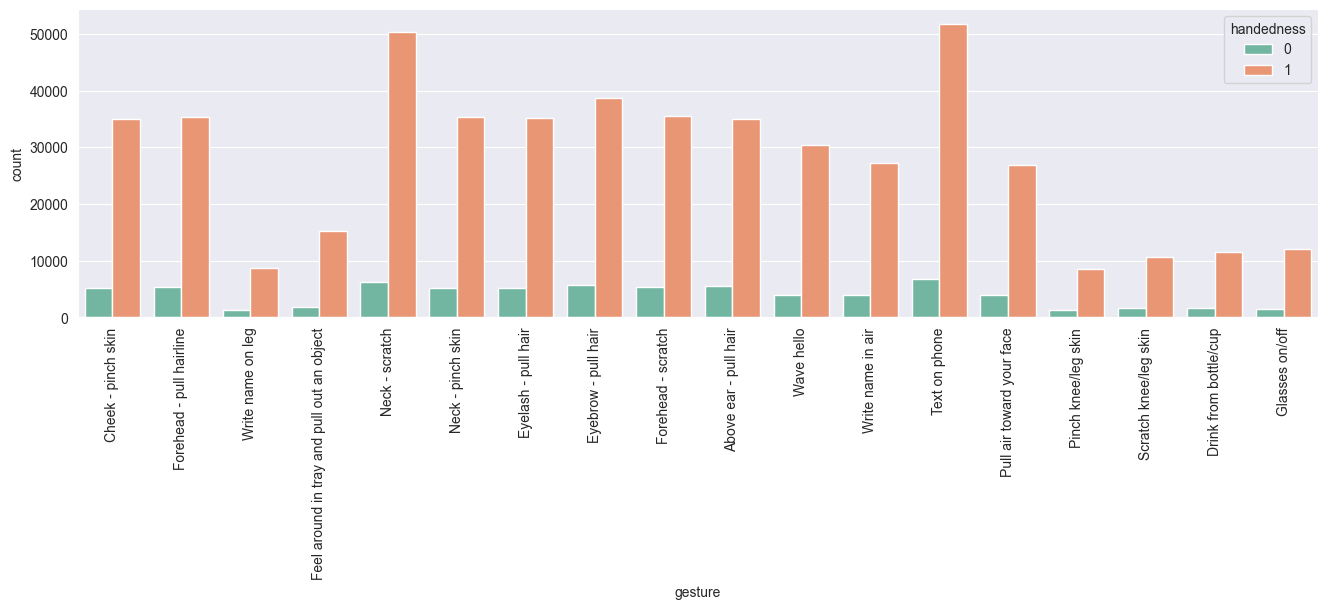

In [19]:
from tqdm.notebook import tqdm

for col in tqdm(cat_cols):
    plt.figure(figsize=(16, 4))
    sns.countplot(data=non_sensor_df, x="gesture", hue=col, palette="Set2")
    plt.xticks(rotation=90);

  0%|          | 0/7 [00:00<?, ?it/s]

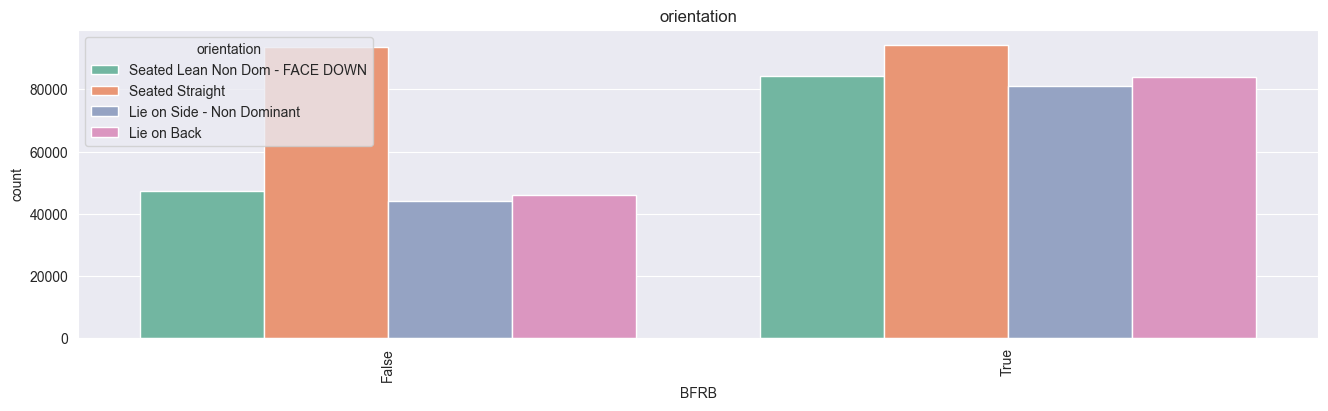

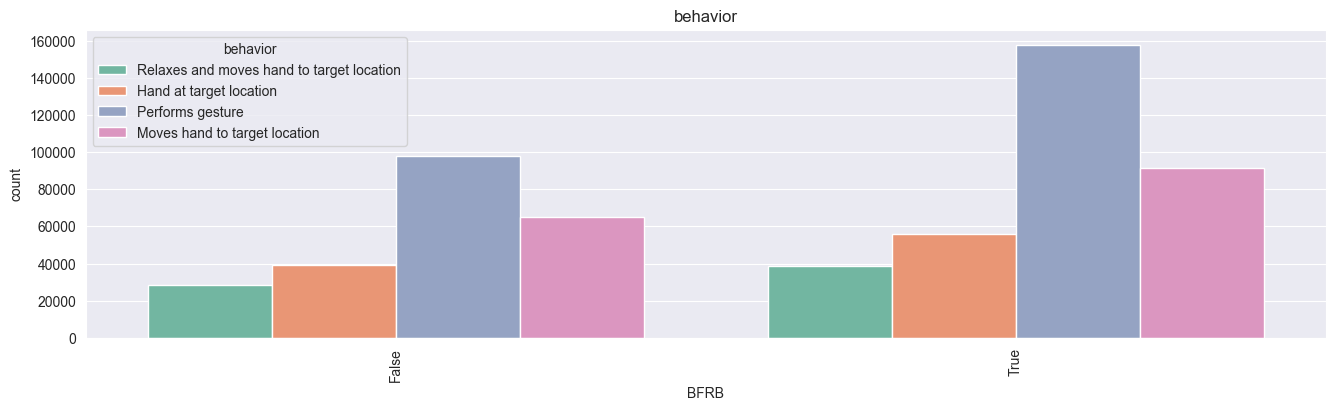

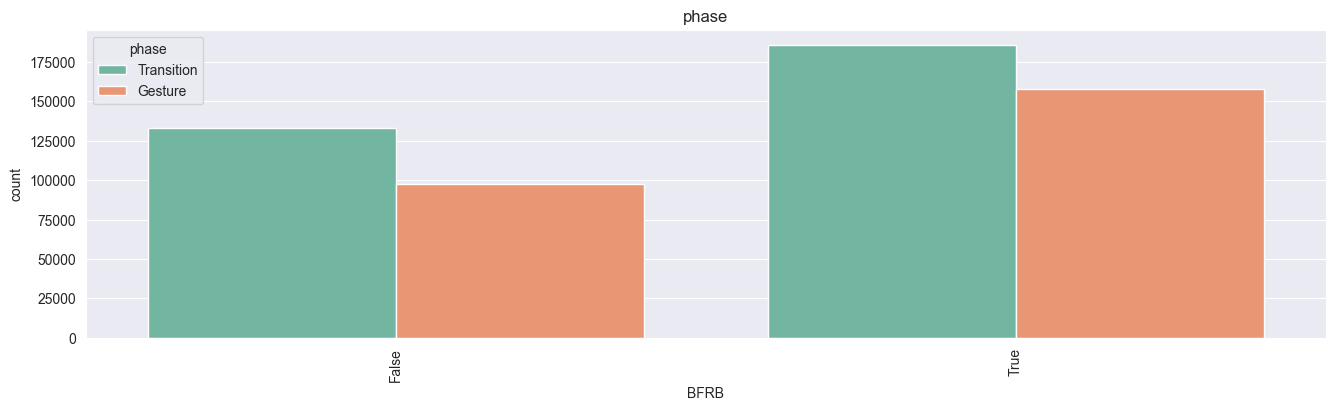

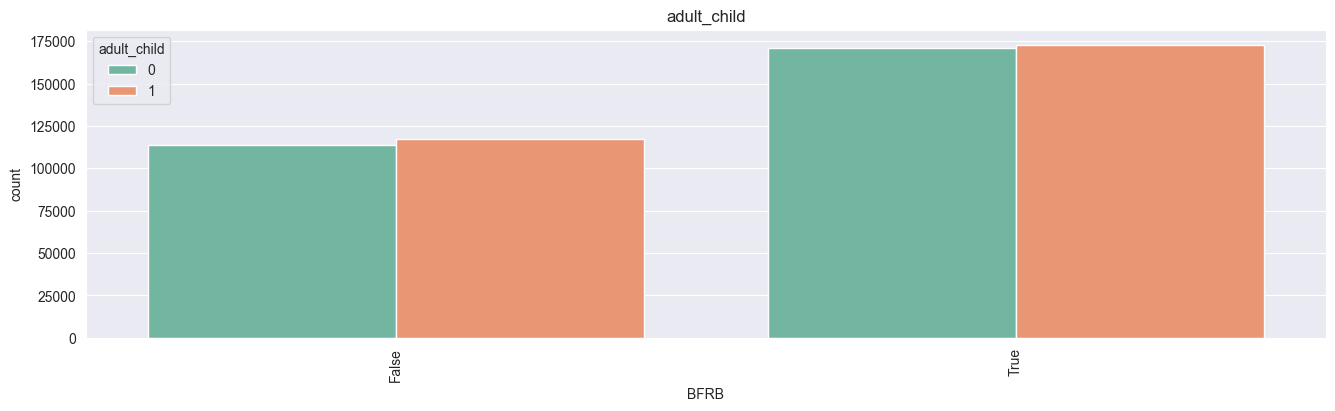

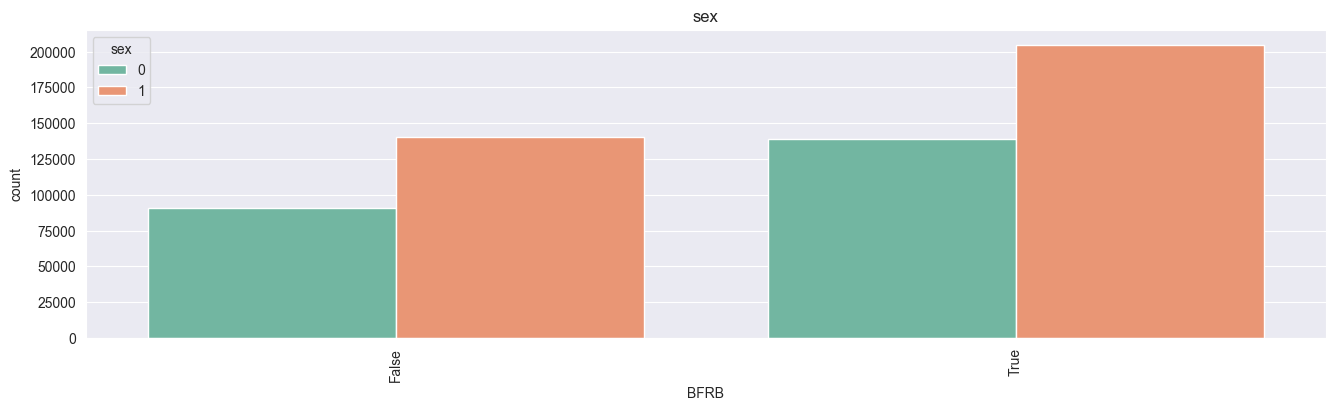

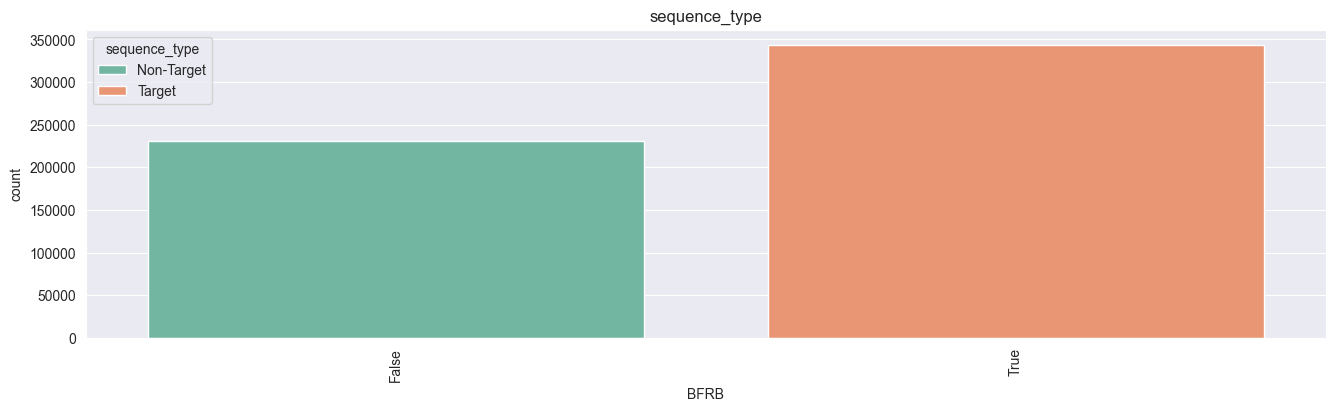

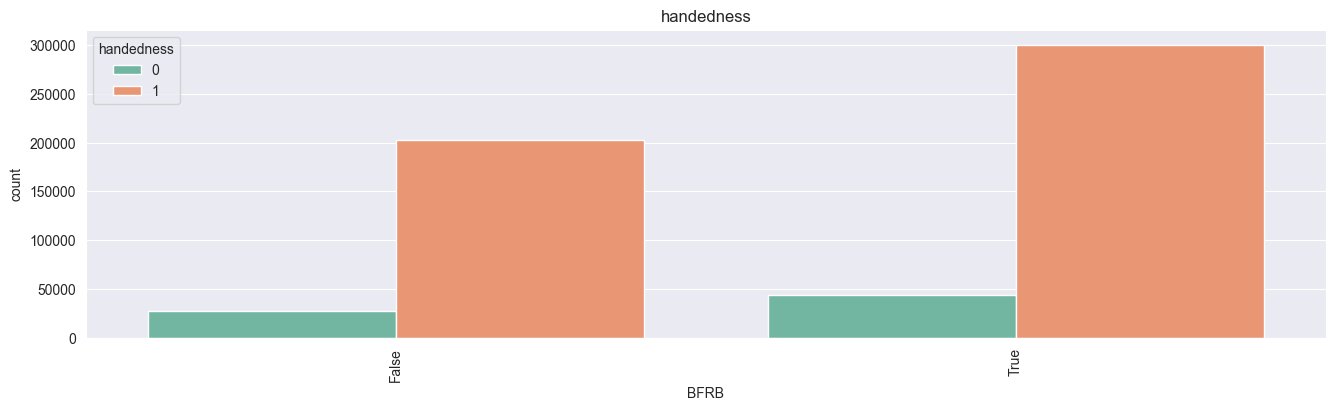

In [20]:
for col in tqdm(cat_cols):
    plt.figure(figsize=(16, 4))
    sns.countplot(data=non_sensor_df, x="BFRB", hue=col, palette="Set2")
    plt.xticks(rotation=90);
    plt.title(col);

  0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/hl/hqtbxwl95mj2hclnn1hfsc3m0000gn/T/ipykernel_82877/237012240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gesture', y=col, data=non_sensor_df, palette='viridis')
/var/folders/hl/hqtbxwl95mj2hclnn1hfsc3m0000gn/T/ipykernel_82877/237012240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gesture', y=col, data=non_sensor_df, palette='viridis')
/var/folders/hl/hqtbxwl95mj2hclnn1hfsc3m0000gn/T/ipykernel_82877/237012240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gesture', y=col, data=non_sensor_df, palette=

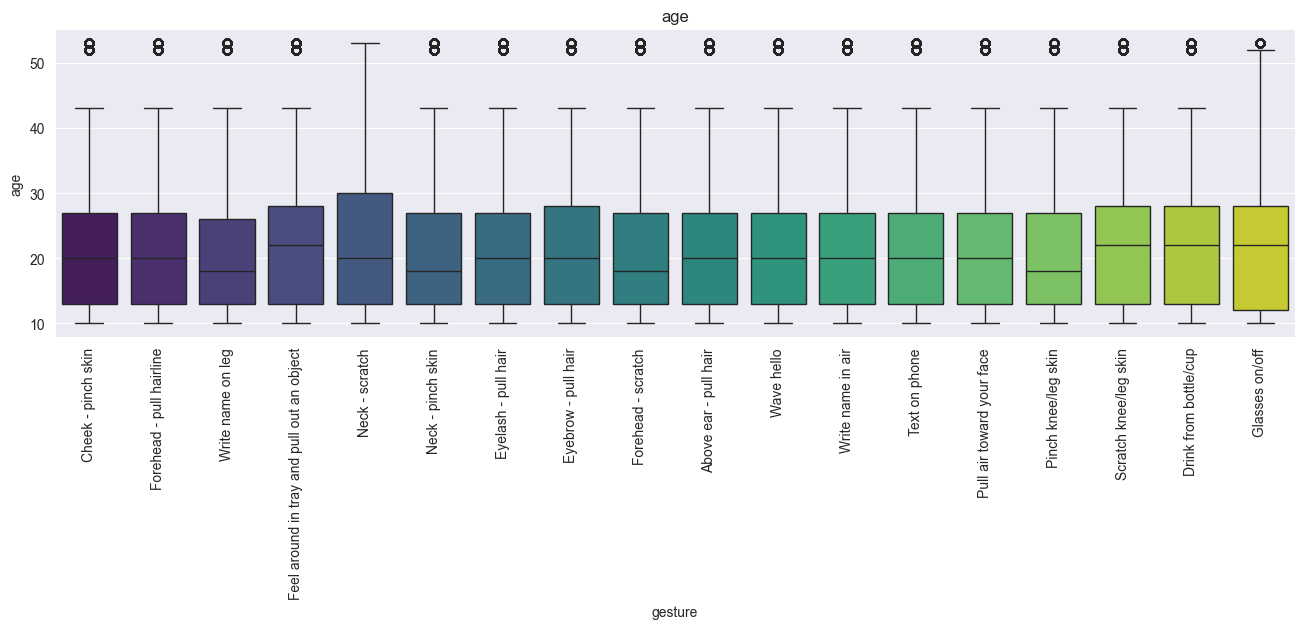

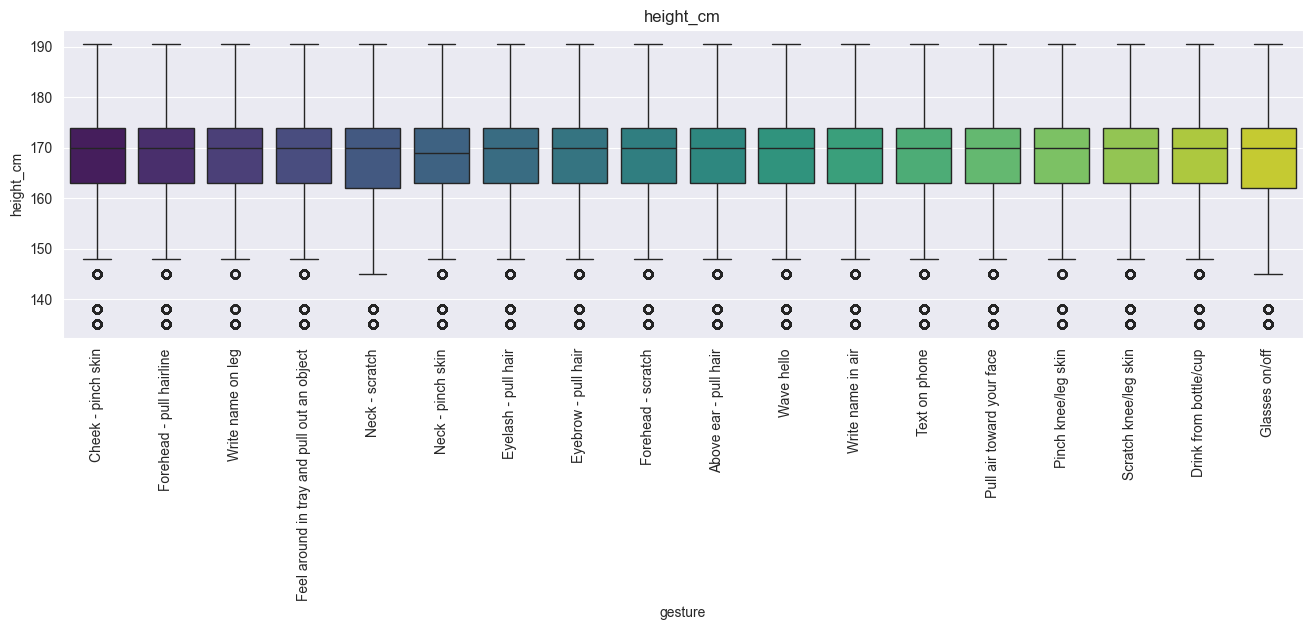

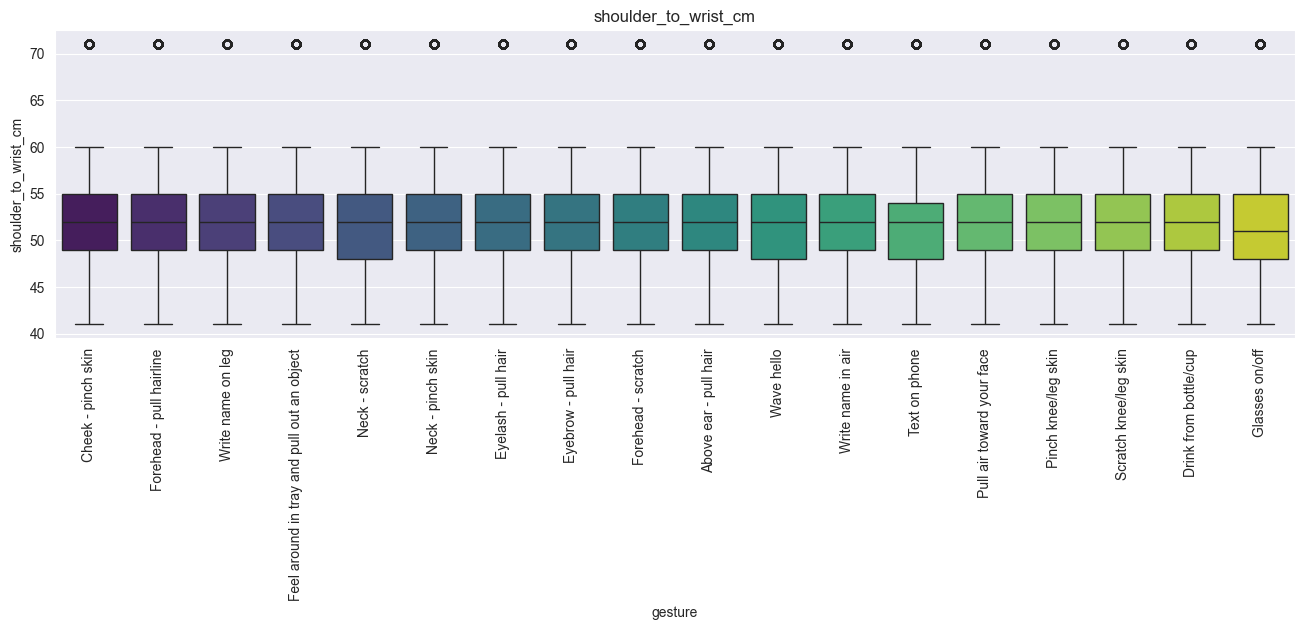

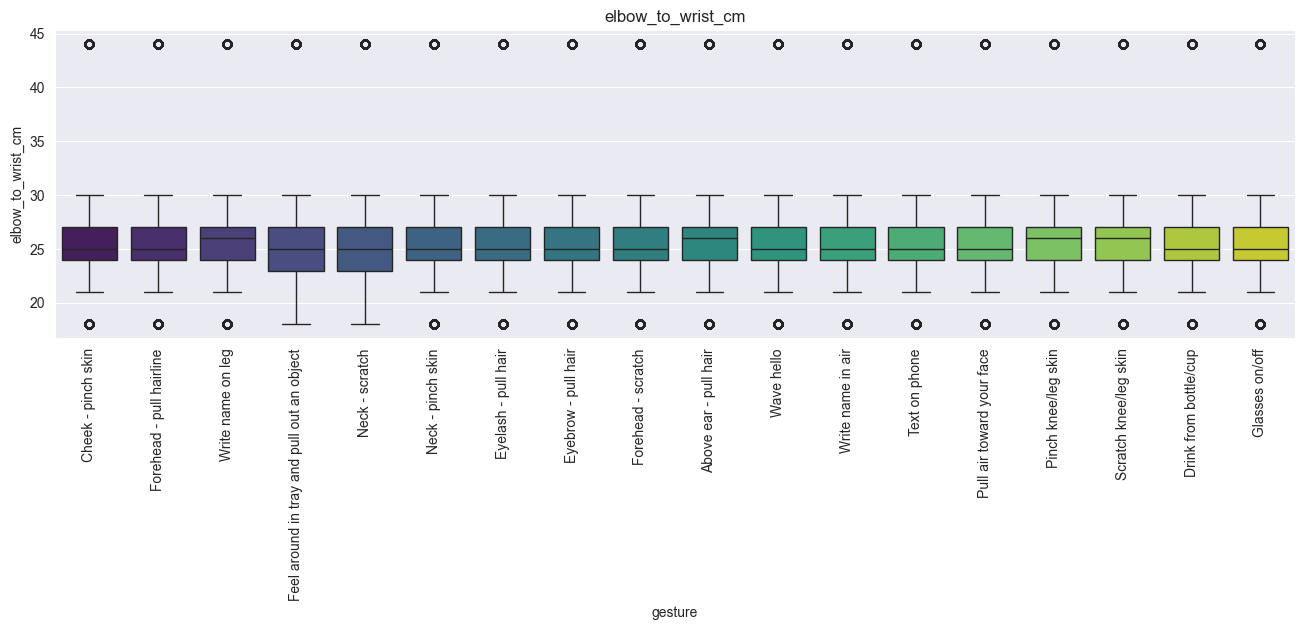

In [21]:
for col in tqdm(num_cols):
    plt.figure(figsize=(16, 4))
    sns.boxplot(x='gesture', y=col, data=non_sensor_df, palette='viridis')
    plt.title(col);
    plt.xticks(rotation=90);

In [22]:
sensor_df.head()

,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,thm_3,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
row_id,,,,,,,,,,,,,,,,,,,,,
SEQ_000007_000000,6.683594,6.214844,3.355469,0.134399,-0.355164,-0.447327,-0.809753,28.943842,31.822186,29.553024,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
SEQ_000007_000001,6.949219,6.214844,3.125000,0.143494,-0.340271,-0.428650,-0.824524,29.340816,31.874645,29.791740,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
SEQ_000007_000002,5.722656,5.410156,5.421875,0.219055,-0.274231,-0.356934,-0.865662,30.339359,30.935045,30.090014,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
SEQ_000007_000003,6.601562,3.531250,6.457031,0.297546,-0.264160,-0.238159,-0.885986,30.543730,27.044001,29.310717,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
SEQ_000007_000004,5.566406,0.277344,9.632812,0.333557,-0.218628,-0.063538,-0.914856,29.317265,25.270855,26.808746,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [23]:
def plot_sensor_images(row):
    
    plt.figure(figsize=(15, 3))
    
    for sensor in range(1,6):
        mat = []
        for i in range(64):
            mat.append(sensor_df.iloc[row][f"tof_{sensor}_v{i}"])
        
        plt.subplot(1, 5, sensor)
        mat = np.array(mat).reshape(8,8)
        plt.imshow(mat)
        plt.title(f"{sensor_df.iloc[row].name} - tof_{sensor}")


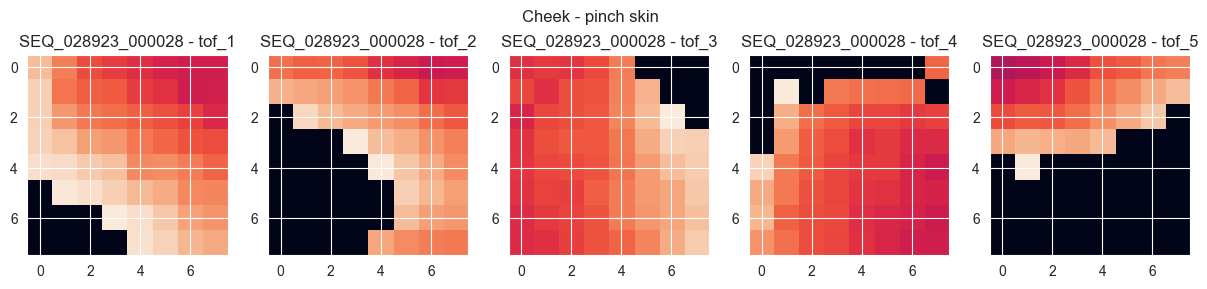

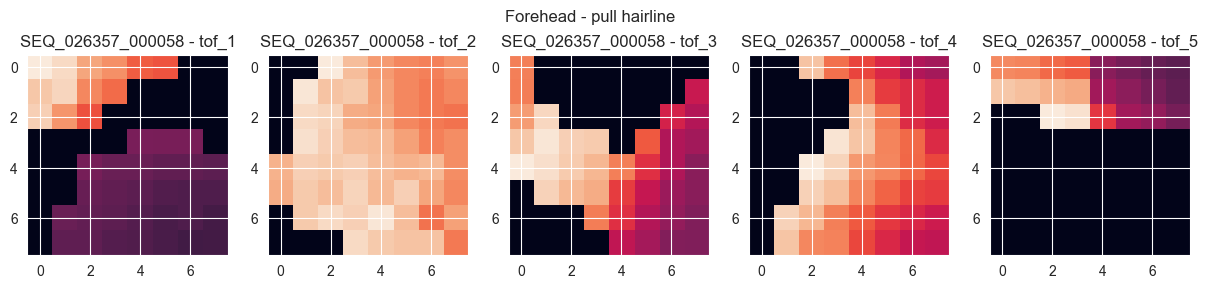

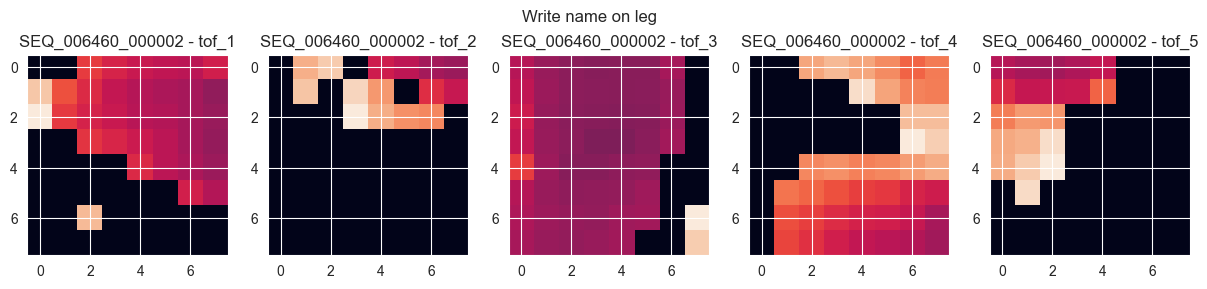

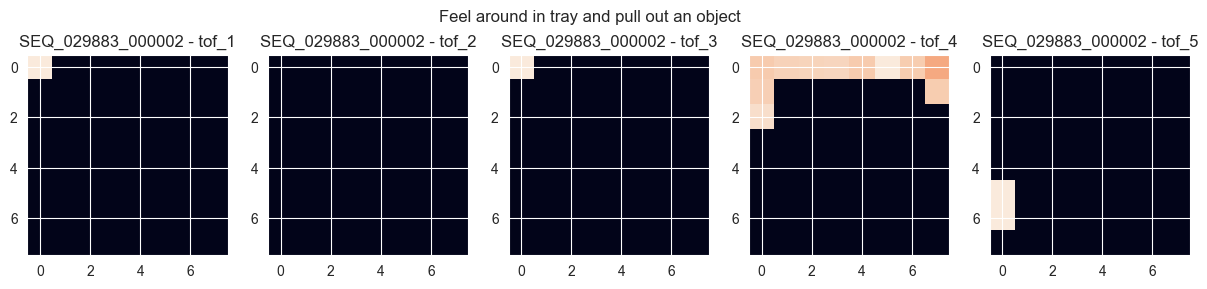

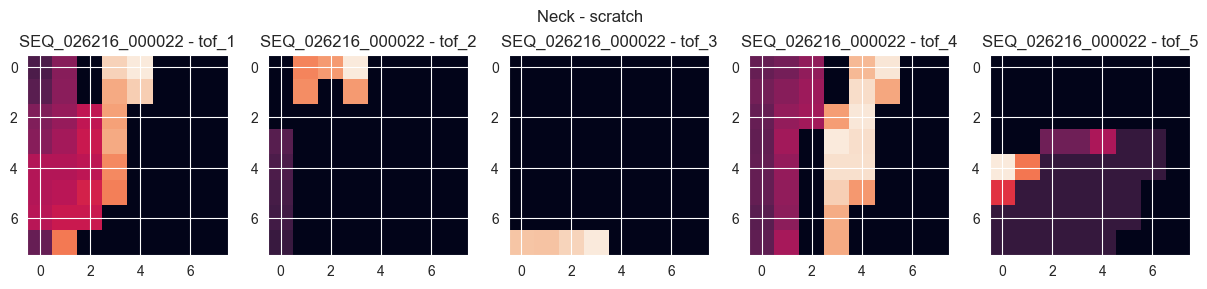

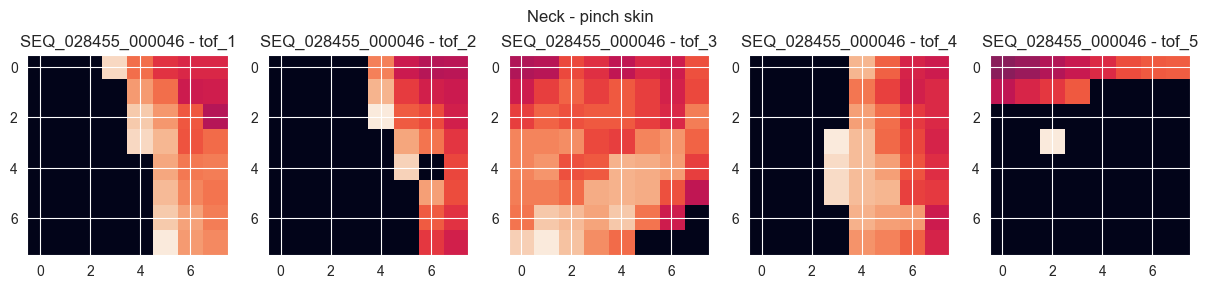

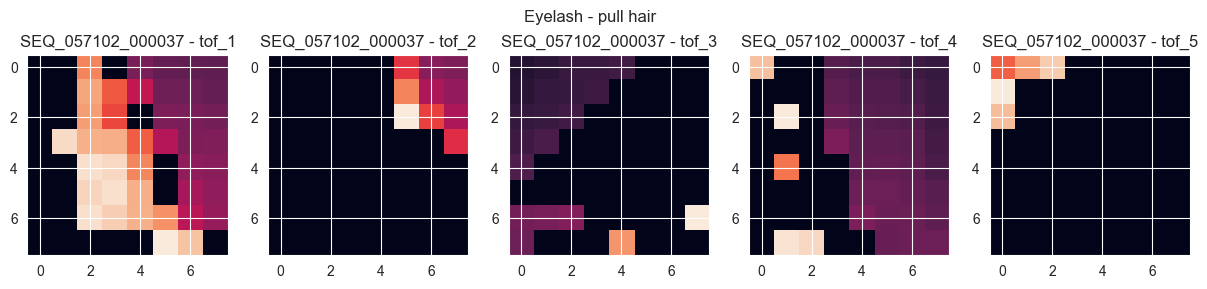

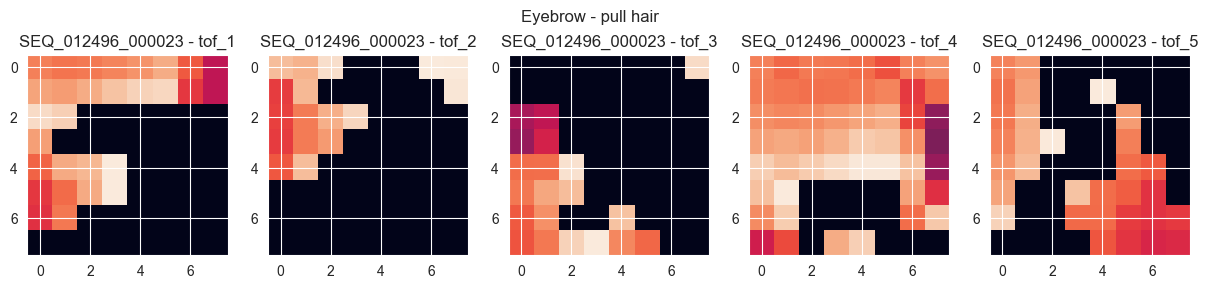

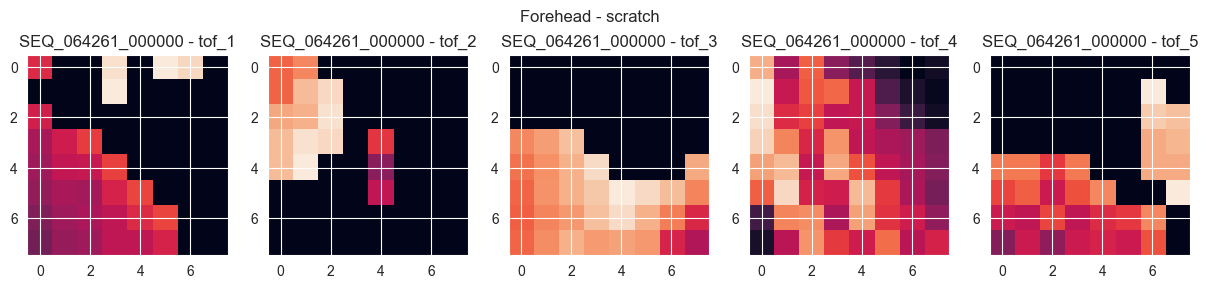

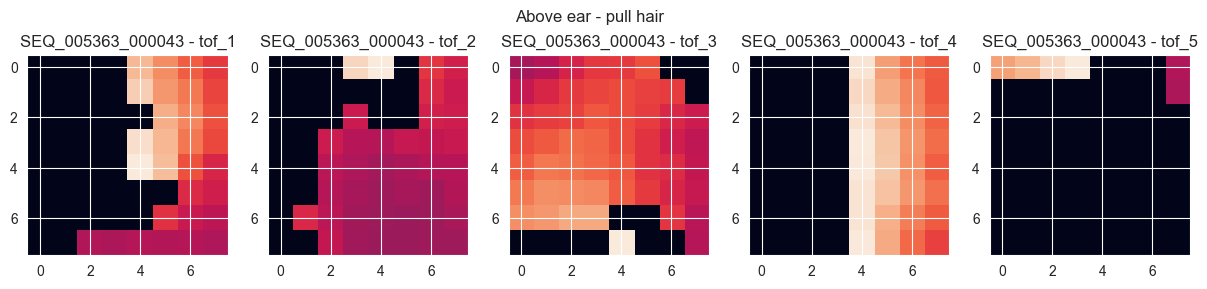

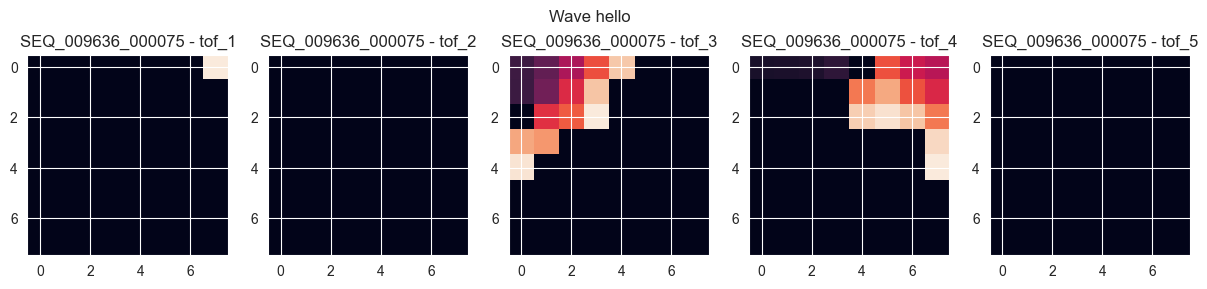

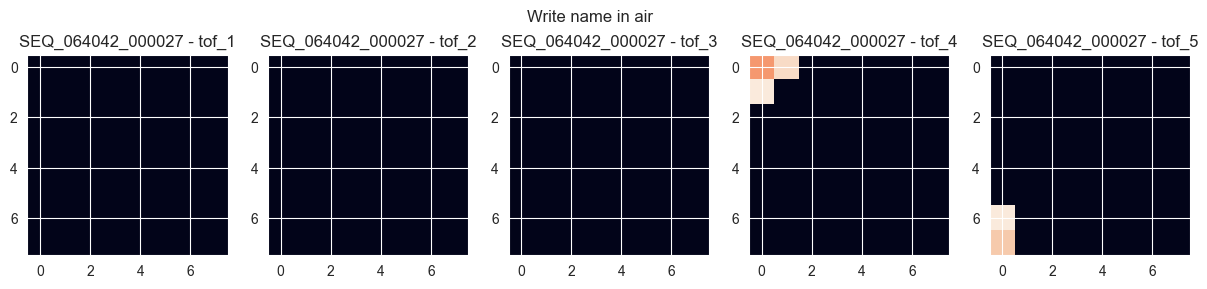

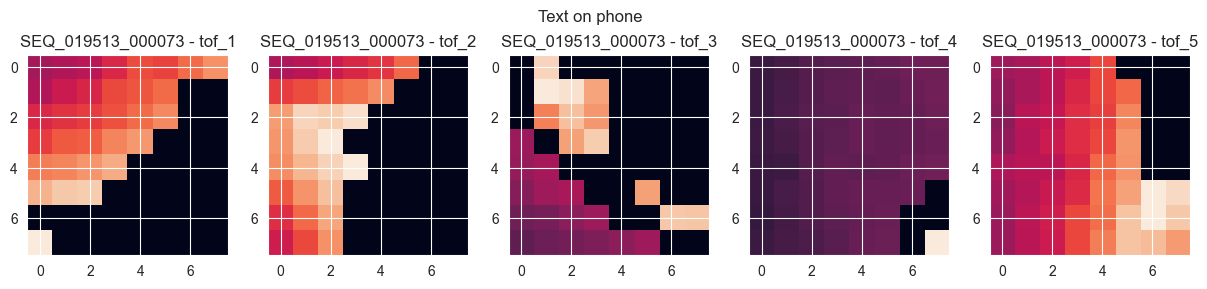

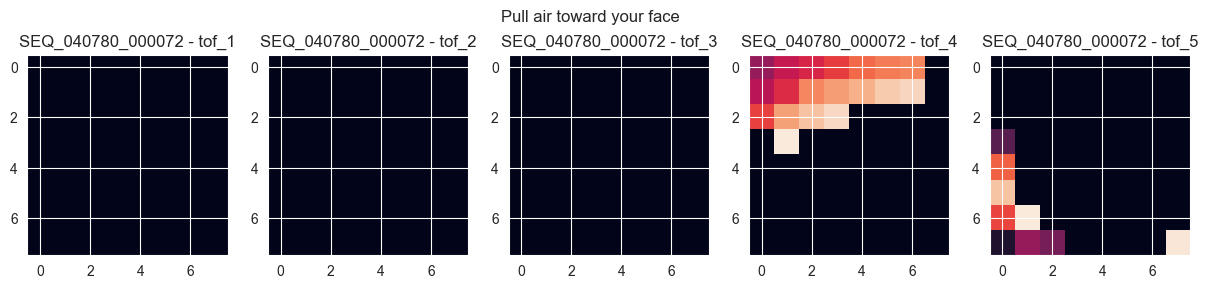

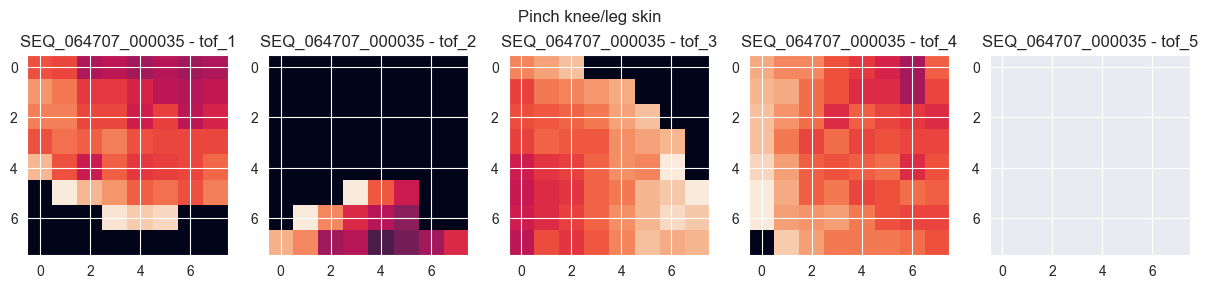

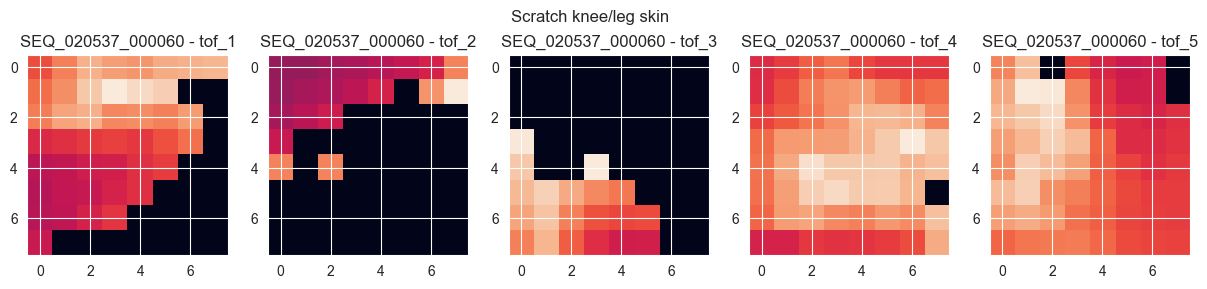

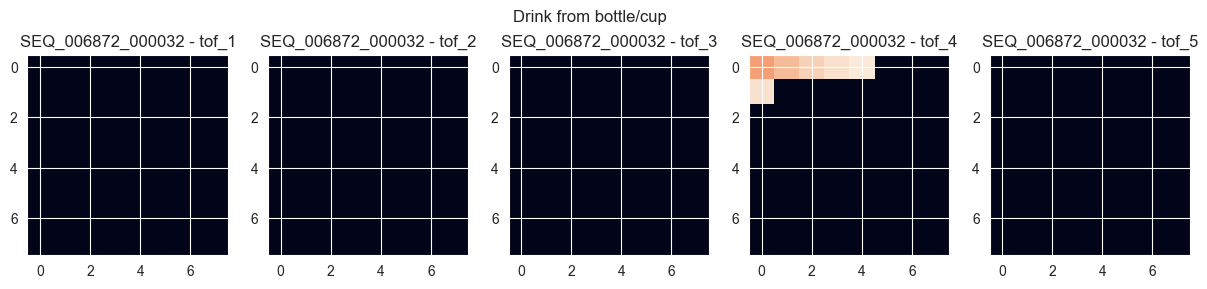

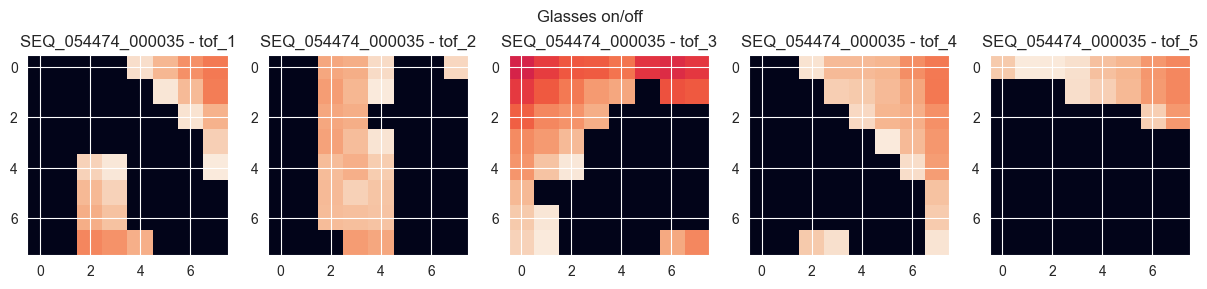

In [28]:
for gest in non_sensor_df.gesture.unique():
    sample_row = non_sensor_df[non_sensor_df['gesture'] == gest].sample(n=1, random_state=SEED).index[0]
    plot_sensor_images(row=sample_row)
    plt.suptitle(gest);

    

In [29]:
thm_cols = sensor_df.filter(like='thm', axis=1).columns.values
sensor_df[thm_cols].min(), sensor_df[thm_cols].max()

(thm_1    -0.370413
 thm_2    21.958820
 thm_3     0.000000
 thm_4    22.375921
 thm_5    22.045000
 dtype: float64,
 thm_1    38.457664
 thm_2    37.578339
 thm_3    37.294994
 thm_4    39.588390
 thm_5    37.683292
 dtype: float64)

In [30]:
thm_data = pd.DataFrame(non_sensor_df.set_index("row_id")[["gesture", "BFRB"]]).join(sensor_df[thm_cols])

In [31]:
thm_data

,gesture,BFRB,thm_1,thm_2,thm_3,thm_4,thm_5
row_id,,,,,,,
SEQ_000007_000000,Cheek - pinch skin,True,28.943842,31.822186,29.553024,28.592863,28.310535
SEQ_000007_000001,Cheek - pinch skin,True,29.340816,31.874645,29.791740,28.663383,28.406172
SEQ_000007_000002,Cheek - pinch skin,True,30.339359,30.935045,30.090014,28.796087,28.529778
SEQ_000007_000003,Cheek - pinch skin,True,30.543730,27.044001,29.310717,29.018711,27.402010
SEQ_000007_000004,Cheek - pinch skin,True,29.317265,25.270855,26.808746,29.408604,27.357603
...,...,...,...,...,...,...,...
SEQ_065531_000048,Write name on leg,False,29.329695,27.966221,27.857061,30.359417,29.501087
SEQ_065531_000049,Write name on leg,False,29.370110,28.101042,27.965866,30.417227,29.244358
SEQ_065531_000050,Write name on leg,False,29.458855,28.060148,27.893045,30.340141,29.244358


/var/folders/hl/hqtbxwl95mj2hclnn1hfsc3m0000gn/T/ipykernel_82877/888845913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gesture', y=col, data=thm_data, ax=axes[i], palette='viridis')
/var/folders/hl/hqtbxwl95mj2hclnn1hfsc3m0000gn/T/ipykernel_82877/888845913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gesture', y=col, data=thm_data, ax=axes[i], palette='viridis')
/var/folders/hl/hqtbxwl95mj2hclnn1hfsc3m0000gn/T/ipykernel_82877/888845913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gesture', y=col, data=thm_data,

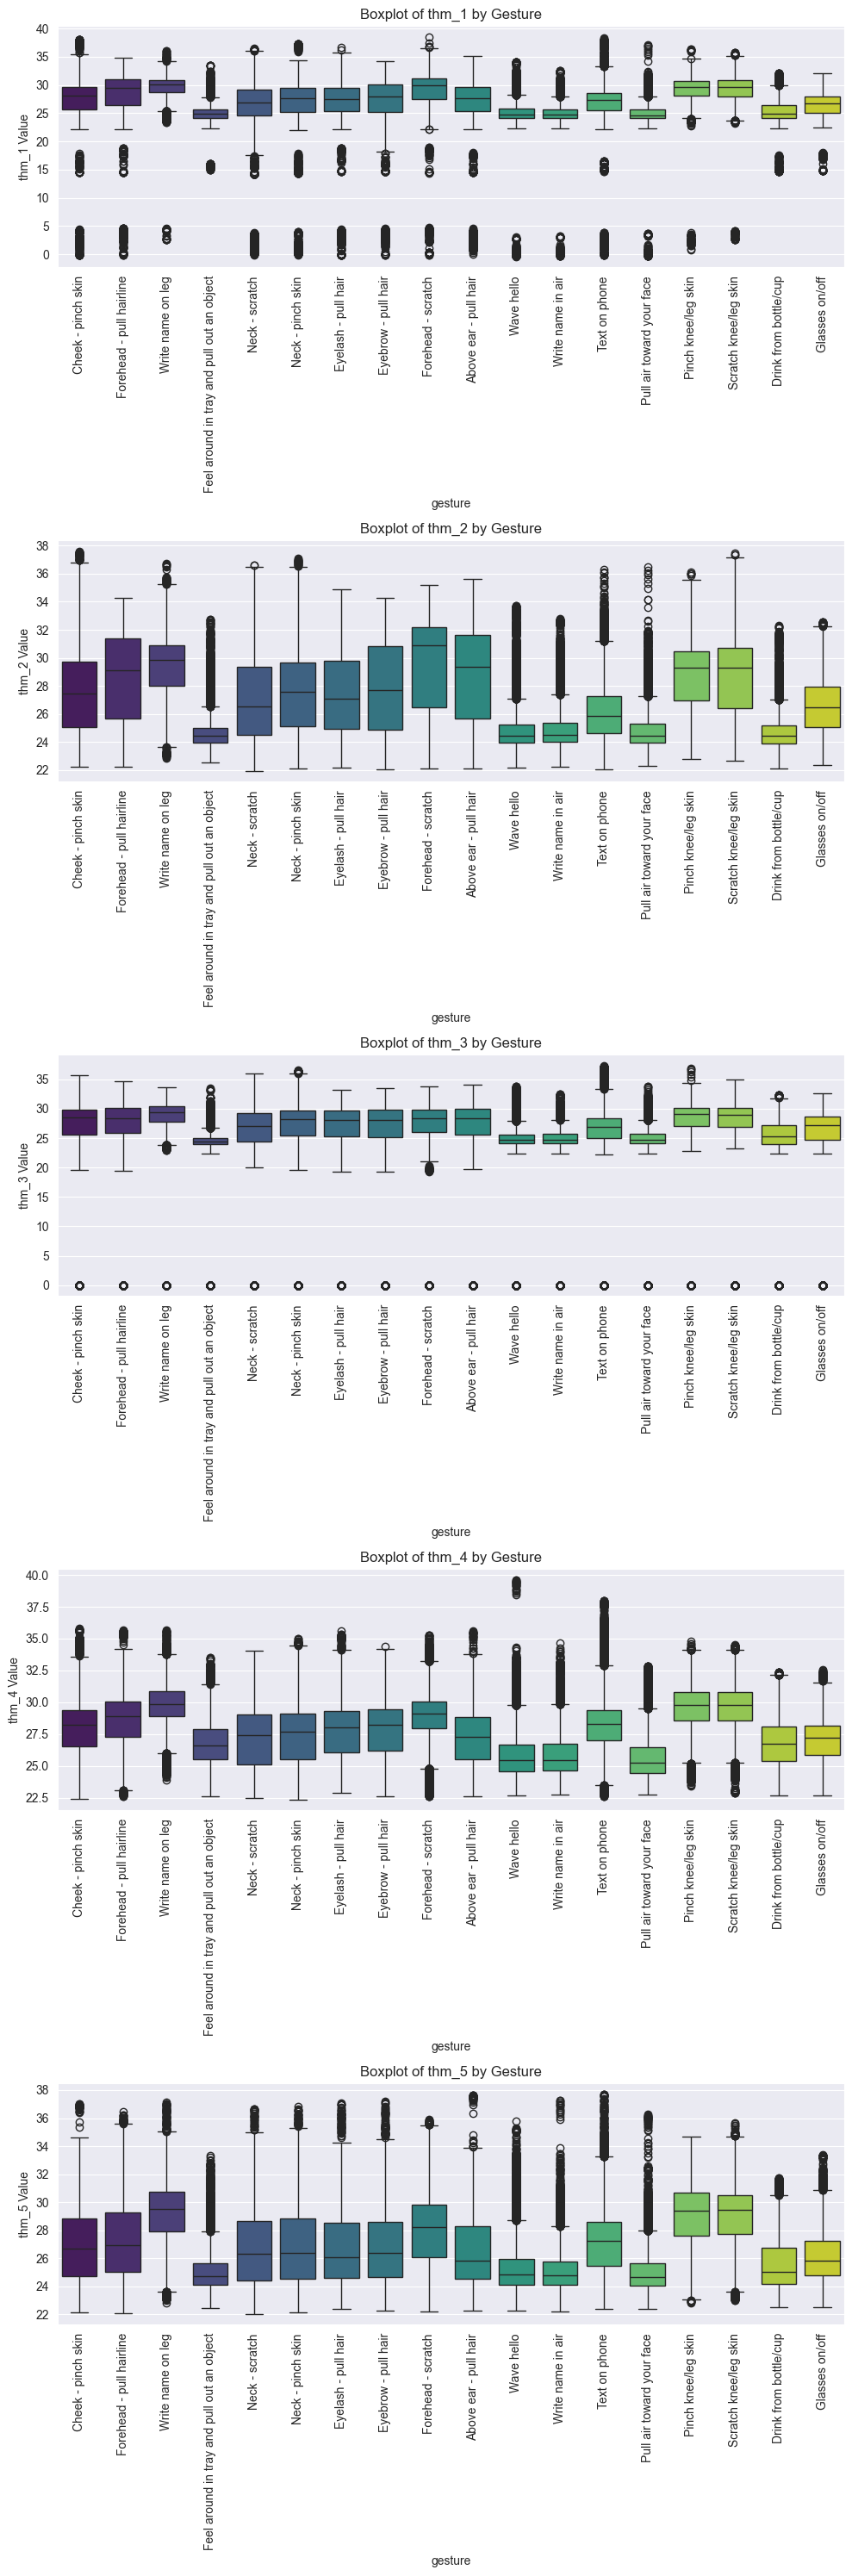

In [32]:
fig, axes = plt.subplots(5, 1, figsize=(10, len(thm_cols)*6), sharey=False)

for i, col in enumerate(thm_cols):
    
    sns.boxplot(x='gesture', y=col, data=thm_data, ax=axes[i], palette='viridis')

    axes[i].set_title(f'Boxplot of {col} by Gesture')
    axes[i].set_xlabel('gesture') 
    axes[i].set_ylabel(f'{col} Value')
    axes[i].tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()